In [12]:
from src import generator
from importlib import reload
import matplotlib.pyplot as plt


### Setting hyperparameters
- Number of trajectories: just for visualization below.
- Number of points: The number of points in the trajectories. The lower the number, the more sparse the trajectory.
- Min/Max in each axis: Limits the points to the given range
- Seed: a random seed to ensure reproducibility

In [13]:
# Number of trajectories:
number_of_trajectories = 8

# Number of points per trajectory:
number_of_points = 300

min_torque_x = 0
max_torque_x = 20
min_torque_y = 0
max_torque_y = 20
min_torque_z = 0
max_torque_z = 20

min_force_x = 0
max_force_x = 300
min_force_y = 0
max_force_y = 300
min_force_z = 0
max_force_z = 600

SEED_torque = 429471
SEED_force = 7234

### Dynamic Trajectory
We instantiate the generator with the set parameters. We then call `dynamic.generate_next()` to get the next trajectory.
The remaining code is mainly for visualization.

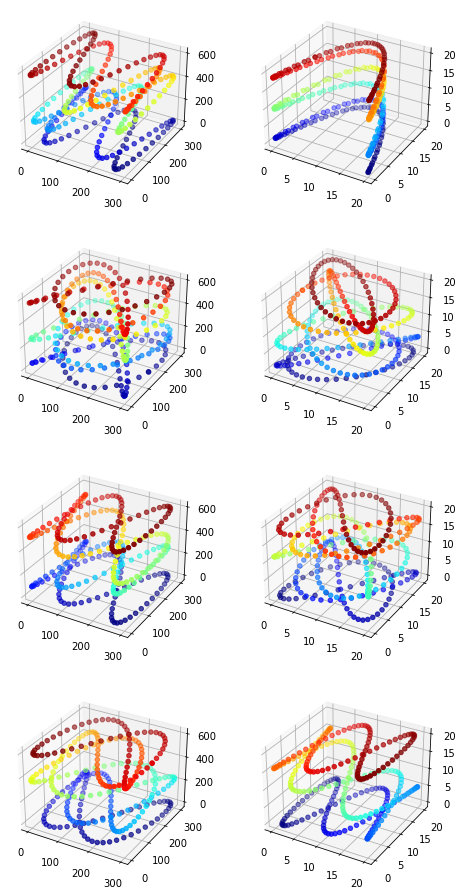

In [14]:
reload(generator)
torque = generator.DynamicTrajectory(min_torque_x, max_torque_x, min_torque_y, max_torque_y, min_torque_z, max_torque_z,seed=SEED_torque,sequence_len=number_of_points)
force = generator.DynamicTrajectory(min_force_x, max_force_x, min_force_y, max_force_y, min_force_z, max_force_z,seed=SEED_force,sequence_len=number_of_points)

fig = plt.figure(figsize=(8,number_of_trajectories*2))

for i in range(0, number_of_trajectories):
    # generate trajectory

    if i % 2 == 0:
        trajectory = force.generate_next()

    else:
        trajectory = torque.generate_next()

    # set up plot
    ax = plt.subplot(int(number_of_trajectories/2),2,i+1, projection='3d')
    cmjet = plt.get_cmap("jet")
    # plot
    ax.scatter(trajectory[:,0],trajectory[:,1],trajectory[:,2],c=trajectory[:,2],cmap=cmjet)
plt.show()

We have the force trajectories on the left and the torque trajectories on the right with the corresponding min/max values.
### Static Trajectory
Static trajectories can be set up exactly as the dynamic trajectories by calling `generator.StaticTrajectory`.

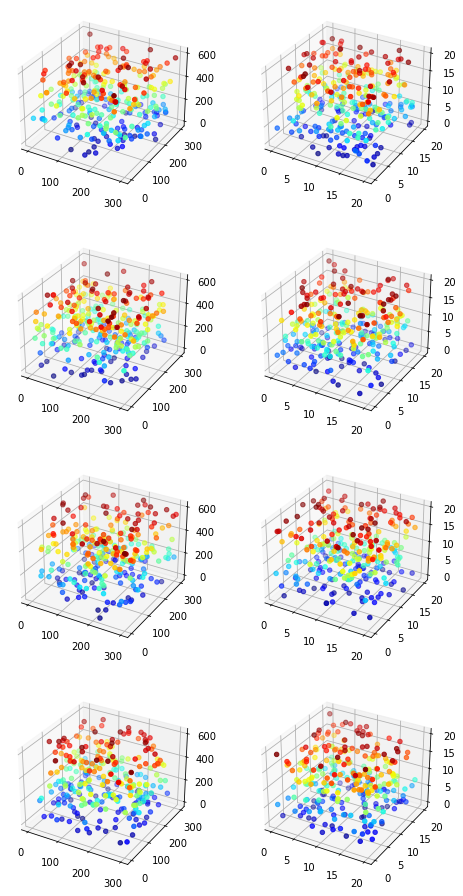

<Figure size 432x288 with 0 Axes>

In [15]:
reload(generator)
torque = generator.StaticTrajectory(min_torque_x, max_torque_x, min_torque_y, max_torque_y, min_torque_z, max_torque_z,seed=SEED_torque,sequence_len=number_of_points)
force = generator.StaticTrajectory(min_force_x, max_force_x, min_force_y, max_force_y, min_force_z, max_force_z,seed=SEED_force,sequence_len=number_of_points)

fig = plt.figure(figsize=(8,number_of_trajectories*2))

for i in range(0, number_of_trajectories):
    # generate trajectory

    if i % 2 == 0:
        trajectory = force.generate_next()

    else:
        trajectory = torque.generate_next()

    # set up plot
    ax = plt.subplot(int(number_of_trajectories/2),2,i+1, projection='3d')
    cmjet = plt.get_cmap("jet")
    # plot
    ax.scatter(trajectory[:,0],trajectory[:,1],trajectory[:,2],c=trajectory[:,2],cmap=cmjet)


plt.savefig('lissajous.png', transparent=False, dpi=300)
plt.show()

plt.savefig('lissajous.png', transparent=False, dpi=300)
plt.show()
